In [2]:
import pandas as pd; import numpy as np; import math
from scipy import stats
import matplotlib.pyplot as plt; import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

import io; import pywebio
from pywebio.input import *; from pywebio.output import *
from pywebio.session import *; from pywebio.pin import *
#http://localhost:60914/

In [3]:
### LOADING IN DATA ###
df = pd.read_csv ("SalaryComp.csv", sep = '\t')
df = df.append({'Name':np.nan, 'Title':'SELECT', '2011':np.nan, '2012':np.nan, '2013':np.nan,
                '2014':np.nan, '2015':np.nan, '2016':np.nan, '2017':np.nan, '2018':np.nan, 
                '2019':np.nan, '2020':np.nan, '2021':np.nan,}, ignore_index=True)
Years = list(df.columns[2:])
YearsRev = Years
YearsRev.reverse()
df[Years] = df[Years].abs() #positive

Titles = sorted(df.Title.unique())
Titles.remove('SELECT'); Titles.insert(0,'SELECT') #select has no data

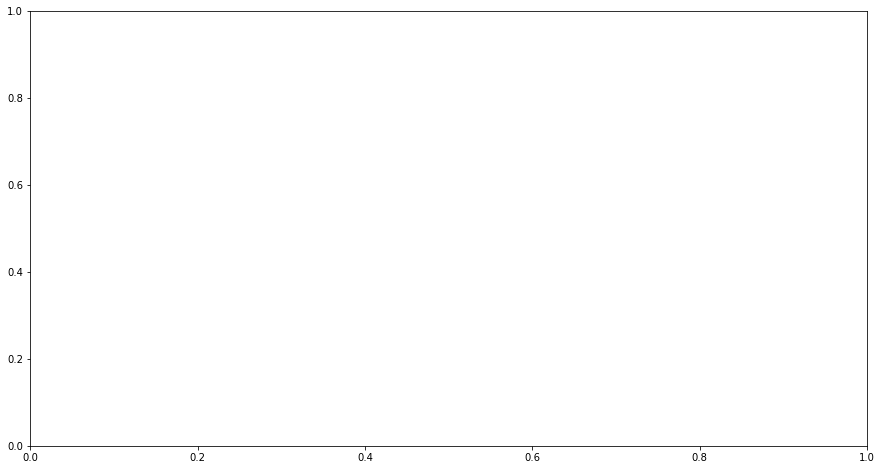

In [4]:
### HISTOGRAM FUNCTION ###

def draw_hist(year):
    ##SET UP X AND Y LIM
    X1B = df[Years[0:]][df.Title == pin.in1] #array of all year's data
    X2B = df[Years[0:]][df.Title == pin.in2] #-
    HIST_BINS = np.arange(0, #bin's ceiling is max of all years, step by 5000
                          (10000 * math.ceil(max(np.nanmax(X1B), np.nanmax(X2B))/10000)), 5000)
    Y1B = [row[~np.isnan(row)] for row in X1B.T.to_numpy()] #array of all years data no NAN
    Y2B = [row[~np.isnan(row)] for row in X2B.T.to_numpy()] #-
    n = [] #initialize ylim
    m = [] #-
    for a in range(11):
        n.append(max(np.histogram(Y1B[a], bins = HIST_BINS)[0])) #array of counts given bins
        m.append(max(np.histogram(Y2B[a], bins = HIST_BINS)[0])) #-
        
    ##SET UP DATA
    dat1 = np.array(df[Years[year-2011]][df.Title == pin.in1]) #array of current year data
    dat2 = np.array(df[Years[year-2011]][df.Title == pin.in2]) #-
    dat1 = dat1[np.logical_not(np.isnan(dat1))] #remove NAN
    dat2 = dat2[np.logical_not(np.isnan(dat2))] #-
    ax1.clear()
    
    ##CREATE HISTOGRAMS
    ax1.hist(dat1, HIST_BINS, lw=1, alpha=0.5, color = "red") #first entry
    ax1.hist(dat2, HIST_BINS, lw=1, alpha=0.5, color = "black") #second entry
    
    ##LEGENDS
    if pin.in1 != 'SELECT' and pin.in2 != 'SELECT':
        ax1.legend([str(pin.in1), str(pin.in2)], fontsize = "large", loc = "upper right")
    elif pin.in2 == 'SELECT':
        ax1.legend([str(pin.in1)], fontsize = "large", loc = "upper right")
    elif pin.in1 == 'SELECT':
        ax1.legend([str(pin.in2)], fontsize = "large", loc = "upper right")
        
    ##HIST FORMAT
    ax1.margins(0, 0.01)
    ax1.grid(which='major', axis='y', linestyle='-') #y gridlines
    ax1.set_ylim(0, 5 * math.ceil(max(max(n),max(m))/5)) #ylim
    
    ##HIST LABS FORMAT
    ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}')) #dollar sign format
    ax1.yaxis.set_major_locator(ticker.MaxNLocator(integer=True)) #y axis integer
    ax1.tick_params(axis='x', labelsize=15) #tick size
    ax1.tick_params(axis='y', labelsize=15) #-
    
    ##HIST LABS
    ax1.text(0.5, 1.04, 'Salary Distribution ' + str(year), #title, format, center
             transform=ax1.transAxes, size=24, weight=600, ha = "center") 
    ax1.set_xlabel('Annual Salaries', size=18, weight=600, labelpad=15) #xlab
    ax1.set_ylabel('Counts', size=18, weight=600, labelpad=15) #ylab
fig1, ax1 = plt.subplots(figsize=(15, 8))

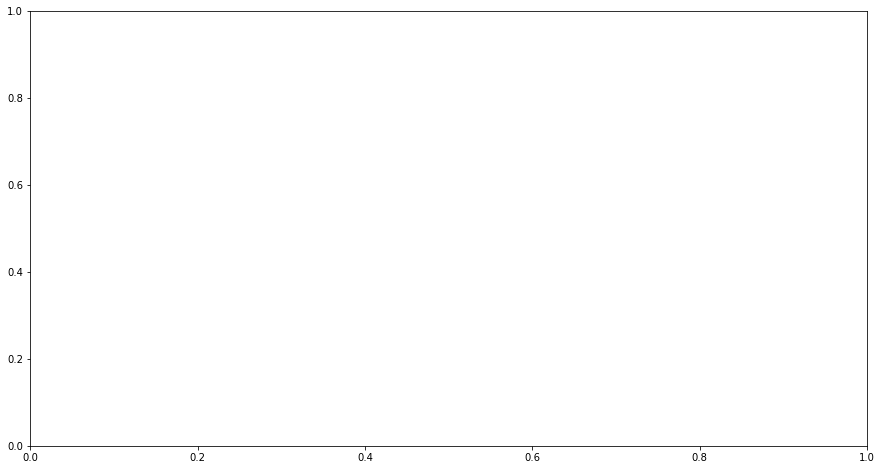

In [5]:
### BOXPLOT FUNCTION ###

def draw_bp(year):
    ##SET UP X AND Y LIM
    B1B = df[Years[0:]][df.Title == pin.in1] #array of all years data
    B2B = df[Years[0:]][df.Title == pin.in2] #-
    BB = (10000 * math.ceil(max(np.nanmax(B1B), np.nanmax(B2B))/10000)) #xlim given all year's data
    
    ##SET UP DATA
    bat1 = np.array(df[Years[year-2011]][df.Title == pin.in1]) #array of current year data
    bat2 = np.array(df[Years[year-2011]][df.Title == pin.in2]) #-
    bat1 = bat1[np.logical_not(np.isnan(bat1))] #take out NAN
    bat2 = bat2[np.logical_not(np.isnan(bat2))] #-
    bat = list([bat2, bat1]) #combine both data
    ax2.clear()
    
    ##CREATE BOXPLOT
    box = ax2.boxplot(bat, vert = False, patch_artist=True)
    
    ##FORMAT BOXPLOT
    for patch, color in zip(box['boxes'], ('k', 'red')): patch.set_facecolor(color) #box colors
    for median, color in zip(box['medians'], ('red', 'k')): median.set_color(color) #median colors
    ax2.get_yaxis().set_visible(False)
    ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}')) #dollar sign format
    ax2.tick_params(axis='x', labelsize=15) #x tick size
    ax2.grid(which='major', axis='x', linestyle='-') #x grid
    ax2.set_xlim(0, BB) #xlim
    
    ##BOXPLOT LABS
    ax2.text(.5, 1.04, 'Salary Distribution ' + str(year), #title, format center
            transform=ax1.transAxes, size=24, weight=600, ha = "center")
    ax2.text(BB/100, 2.15, str(pin.in1), fontsize = 15, weight = 600) #entry 1 lab
    ax2.text(BB/100, 1.15, str(pin.in2), fontsize = 15, weight = 600) #entry 2 lab
    ax2.set_xlabel('Annual Salaries', size=18, weight=600, labelpad=15) #xlab
    
fig2, ax2 = plt.subplots(figsize=(15, 8))

In [ ]:
def main():
    put_markdown("# University of Georgia Staff Salaries by Year") #intro info
    put_markdown("In accordance with the Official Code of Georgia, the Department "
                 "of Audits and Accounts has provided data on all salaries of all "
                 "employees of the State of Georgia and employees of local boards "
                 "of education. All information being analyzed has been released "
                 "on the official "
                 "[Open Georgia](https://open.ga.gov/openga/sta) website. \n\n"
             
                 "&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"
                 "This application creates an animated histogram and table output looking at the "
                 "salaries of all staff at the University of Georgia over the "
                 "years, starting with June 30, 2010 and ending with June 30, "
                 "2021. Each fiscal year begins on July 1st and ends on June 30th "
                 "the following year. \n\n"
                 
                 "&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"
                 "It should be noted that employees who have been entered into the "
                 "database twice under the same in the same year have been excluded. 
                 "In addition, empty graphs indicate that there was no employee that "
                 "held the selected position title in the year shown.")
    ##INPUTS
    put_markdown("## Select Title")
    put_select(name='in1', options=Titles) #select 1
    put_select(name='in2', options=Titles) #select 2
    put_actions('actions', buttons=[ #creating Buttons
        {'label': 'Submit', 'value': 'submit'},
    ], scope=None, position=-1)
    
    while True:
        pin_wait_change(['actions']) #wait for submit button
        with use_scope('ttl', clear=True): #insert scope, clear when renewed
            with put_loading(): #loading animation circle thingy
                
                ##CALL ANIMATIONS
                hist_ani = animation.FuncAnimation(fig1, draw_hist, frames=range(2011, 2022)) #animated hist call
                bp_ani = animation.FuncAnimation(fig2, draw_bp, frames=range(2011, 2022)) #animated boxplot call
                ##CREATE TABLES
                tab1 = df[Years[0:]][df.Title == pin.in1].sort_values( #table of all salaries by person, sorted by year desc
                    by = YearsRev, ascending = [False]*11, na_position = 'last'); tab1 = tab1.dropna(axis=1, how='all')
                tab2 = df[Years[0:]][df.Title == pin.in2].sort_values( #-, sal desc, na = last, drop if col empty
                    by = YearsRev, ascending = [False]*11, na_position = 'last'); tab2 = tab2.dropna(axis=1, how='all')
                
                
                ##OUTPUTS
                if pin.in1 != 'SELECT' and pin.in2 != 'SELECT': #if for if some empty
                    put_tabs([
                    {'title': 'Animated Histogram', 'content': put_html(HTML(hist_ani.to_jshtml()))}, #title, hist
                    {'title': 'Animated Boxplot', 'content': [ #boxplot
                        put_html(HTML(bp_ani.to_jshtml())) #
                        #,
                        #put_markdown("#### Input salary to calculate percentile"),
                        #put_input(type='number',  name="AS") #validate=None, placeholder=None
                        ]},
                    {'title': 'Salaries Table 1', 'content': [ #title, table 1
                        put_markdown("### Table of Annual Salaries for " + str(pin.in1)),
                        put_html(tab1.to_html(border=0,table_id="Table of Annual Salaries by Employee"))]},
                    {'title': 'Salaries Table 2', 'content': [ #title, table 2
                        put_markdown("### Table of Annual Salaries for " + str(pin.in2)),
                        put_html(tab2.to_html(border=0,table_id="Table of Annual Salaries by Employee"))]}
                    ])
                elif pin.in2 == 'SELECT':
                    put_tabs([
                    {'title': 'Animated Histogram', 'content': put_html(HTML(hist_ani.to_jshtml()))},
                    {'title': 'Salaries Table', 'content': [
                        put_markdown("### Table of Annual Salaries for " + str(pin.in1)),
                        put_html(tab1.to_html(border=0,table_id="Table of Annual Salaries by Employee"))]}
                    ])
                elif pin.in1 == 'SELECT':
                    put_tabs([
                    {'title': 'Animated Histogram', 'content': put_html(HTML(hist_ani.to_jshtml()))},
                    {'title': 'Salaries Table', 'content': [
                        put_markdown("### Table of Annual Salaries for " + str(pin.in2)),
                        put_html(tab2.to_html(border=0,table_id="Table of Annual Salaries by Employee"))]}
                    ])

main()